In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import json
from pprint import pprint
from config import g_key

# Resource File (CSV)
df = pd.read_csv("output_data/clean_fiveCities.csv")

In [61]:
# Configure gmaps with API key
gmaps.configure(api_key=g_key)

#Drop unused columns
map_df = df[["Restaurant_id", "Name", "Locality", "City", "Latitude", "Longitude", "Zip Code", "Price Range", "Average Cost for two",
             "User Rating", "Rating Text","Votes", "all_reviews_count", "Cuisines","0"]]

#Selecting the top 100 restaurants in Australia based on User ratings and number of votes
ranked_df = map_df.sort_values(["User Rating", "Votes"], ascending = False)

#Reset the index
new_index_ranked = ranked_df.reset_index(drop=True)
new_index_ranked

,Restaurant_id,Name,Locality,City,Latitude,Longitude,Zip Code,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines,0
0,16572612,Vue de monde,CBD,Melbourne,-37.818954,144.957934,3000.0,4,600,4.9,Excellent,3225,986,"Australian, Contemporary",Australian
1,16585905,Tipo 00,CBD,Melbourne,-37.813528,144.961973,3000.0,4,150,4.9,Excellent,1927,717,Italian,Italian
2,17881527,Dexter,Preston,Melbourne,-37.736196,145.004456,NaN,4,110,4.9,Excellent,1473,682,"American, BBQ",American
3,16558798,Quay,Circular Quay,Sydney,-33.858029,151.209970,2000.0,4,500,4.9,Excellent,1366,454,Modern Australian,Modern Australian
4,16559171,Tetsuya's,CBD,Sydney,-33.875143,151.204932,NaN,4,440,4.9,Excellent,1234,329,Japanese,Japanese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,16586992,Jolley's Boathouse,City Centre,Adelaide,-34.917011,138.600296,5000.0,4,120,4.2,Very Good,233,93,"Seafood, Modern Australian",Seafood
493,16587014,Lenzerheide Restaurant,Kingswood,Adelaide,-34.972047,138.609192,5062.0,4,120,4.2,Very Good,233,82,European,European
494,16588907,The Gallery,"Waymouth Street, City Centre",Adelaide,-34.925872,138.598311,5000.0,4,100,4.2,Very Good,166,89,"Tapas, Bar Food",Tapas
495,16589555,Sukhumvit Soi 38,City Centre,Adelaide,-34.923131,138.605479,5000.0,3,90,4.2,Very Good,145,78,Thai,Thai


In [62]:
#Select the top 100 restaurants
top_100 = new_index_ranked.loc[new_index_ranked.index <100]
top_100

,Restaurant_id,Name,Locality,City,Latitude,Longitude,Zip Code,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines,0
0,16572612,Vue de monde,CBD,Melbourne,-37.818954,144.957934,3000.0,4,600,4.9,Excellent,3225,986,"Australian, Contemporary",Australian
1,16585905,Tipo 00,CBD,Melbourne,-37.813528,144.961973,3000.0,4,150,4.9,Excellent,1927,717,Italian,Italian
2,17881527,Dexter,Preston,Melbourne,-37.736196,145.004456,NaN,4,110,4.9,Excellent,1473,682,"American, BBQ",American
3,16558798,Quay,Circular Quay,Sydney,-33.858029,151.209970,2000.0,4,500,4.9,Excellent,1366,454,Modern Australian,Modern Australian
4,16559171,Tetsuya's,CBD,Sydney,-33.875143,151.204932,NaN,4,440,4.9,Excellent,1234,329,Japanese,Japanese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16590137,Zum Kaiser,Woolloongabba,Brisbane,-27.484477,153.036863,4169.0,3,60,4.7,Excellent,296,83,German,German
96,16561357,Ormeggio At The Spit,"D'Albora Marinas, Mosman",Sydney,-33.804225,151.245839,2088.0,4,300,4.7,Excellent,286,131,Italian,Italian
97,16574463,Katik Take Away Food,Campbellfield,Melbourne,-37.666874,144.948233,3061.0,2,40,4.7,Excellent,284,109,"Middle Eastern, Turkish",Middle Eastern
98,16589254,127 Days,Croydon Park,Adelaide,-34.875846,138.566375,5008.0,2,50,4.7,Excellent,267,123,"American, Burger, Sandwich",American


In [63]:
# Store 'Lat' and 'Lng' into  locations 
locations = top_100[["Latitude", "Longitude"]].astype(float)

#Store User rating value 
user_rating = top_100["User Rating"].astype(float)

# Create a User rating Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=user_rating, 
                                 dissipating=False, max_intensity=4.9,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [64]:
#Creating a restaurant symbol map

# Using the template add the restaurant marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Name}</dd>
<dt>Cuisine</dt><dd>{Cuisines}</dd>
<dt>User rating</dt><dd>{Rating Text}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
restaurant_info = [info_box_template.format(**row) for index, row in top_100.iterrows()]
locations = top_100[["Latitude", "Longitude"]]

In [65]:
# Add marker layer ontop of heat map

# Create hotel layer
restaurant_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=5,
    info_box_content=restaurant_info
)
fig = gmaps.figure()
fig.add_layer(restaurant_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [106]:
#Analysing average cost for two per city

#Group df (5 cities) by City
group_city = df.groupby("City")
#Calculate the average cost for two per city
average_city = pd.DataFrame(group_city["Average Cost for two"].mean())
#Calculate the average user rating per city
average_rating = pd.DataFrame(group_city["User Rating"].mean())
#Add the average rating in the Dataframe
average_city["Average User Rating"] = average_rating

#Formating the data
#average_city["Average Cost for two"]=average_city["Average Cost for two"].map("{:,.2f}".format)
#average_city["Average User Rating"]=average_city["Average User Rating"].map("{:,.2f}".format)

average_city

,Average Cost for two,Average User Rating
City,,
Adelaide,79.030612,4.394898
Brisbane,73.330000,4.512000
Melbourne,120.650000,4.668000
Perth,81.636364,4.465657
Sydney,98.050000,4.626000


In [107]:
#Reset the index of dataframe average_city
average_city = average_city.reset_index()
average_city

,City,Average Cost for two,Average User Rating
0,Adelaide,79.030612,4.394898
1,Brisbane,73.330000,4.512000
2,Melbourne,120.650000,4.668000
3,Perth,81.636364,4.465657
4,Sydney,98.050000,4.626000


<function matplotlib.pyplot.show(*args, **kw)>

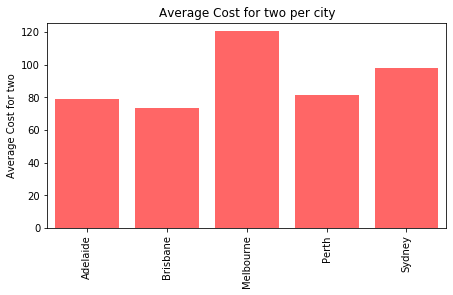

In [113]:
#Creating bar graphs to show the averages across cities

#Set the axis and tick locations
x = average_city["City"]
y = average_city["Average Cost for two"]
tick_locations = [value for value in x]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6.4,4.2))
plt.bar(x, y, color='r', alpha=0.6, align="center")
plt.xticks(tick_locations, x, rotation="90")

# Set x and y limits
plt.xlim(-0.5, len(x)-0.5)
plt.ylim(0, max(y)+5)

# Set a Title and labels
plt.title("Average Cost for two per city")
plt.ylabel("Average Cost for two")

# Save our graph and show the grap
plt.tight_layout()
plt.show

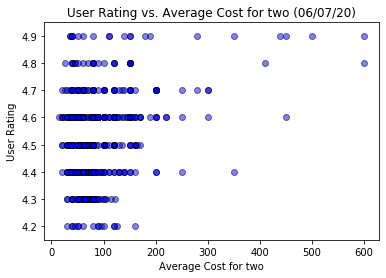

In [68]:
#Scatter plot Average cost for two vs User Rating
x = df["Average Cost for two"]
y = df["User Rating"] 

plt.scatter(x,y, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Average Cost for two')
plt.ylabel('User Rating')
plt.title('User Rating vs. Average Cost for two (06/07/20)')
plt.savefig('images/User Rating vs. Average Cost.png')
plt.show()